In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("lone.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
print(type(df))
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
(367, 12)


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [6]:
# Missing value counts per column
missing = df.isnull().sum()
print("Missing values:\n", missing)


Missing values:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [7]:
# Fill categorical with mode
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Fill numeric with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


# Verify missing values are handled
df.isnull().sum()



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [8]:
# Total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Loan amount log to reduce skewness
df['LoanAmount_Log'] = np.log(df['LoanAmount'])


In [9]:
print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income',
       'LoanAmount_Log'],
      dtype='object')


In [10]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Optional: make all column names consistent
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.title()

print(df.columns)


Index(['Loan_Id', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicantincome', 'Coapplicantincome', 'Loanamount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income',
       'Loanamount_Log'],
      dtype='object')


In [11]:
'Loan_Status' in df.columns


False

In [12]:
print(df.head())


    Loan_Id Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   Applicantincome  Coapplicantincome  Loanamount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  Total_Income  Loanamount_Log  
0             1.0         Urban          5720        4.700480  
1             1.0         Urba

In [13]:
import pandas as pd

# Load dataset (make sure train.csv is in the same folder)
df = pd.read_csv("lone.csv")

# Check if loaded
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [14]:
print(list(df.columns))


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [15]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace('\r', '')
    .str.replace('\n', '')
)

print(list(df.columns))


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [16]:
df.rename(columns={'LoanStatus': 'Loan_Status'}, inplace=True)
# OR
df.rename(columns={'loan_status': 'Loan_Status'}, inplace=True)

print(list(df.columns))


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [17]:
'Loan_Status' in df.columns


False

In [18]:
print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [19]:
import pandas as pd

df = pd.read_csv("lone.csv")

print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [20]:
df = pd.read_csv("train.csv")


In [21]:
print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


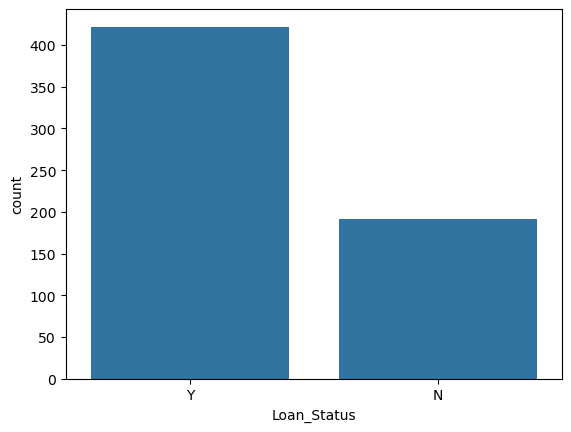

In [22]:
sns.countplot(x='Loan_Status', data=df)
plt.show()


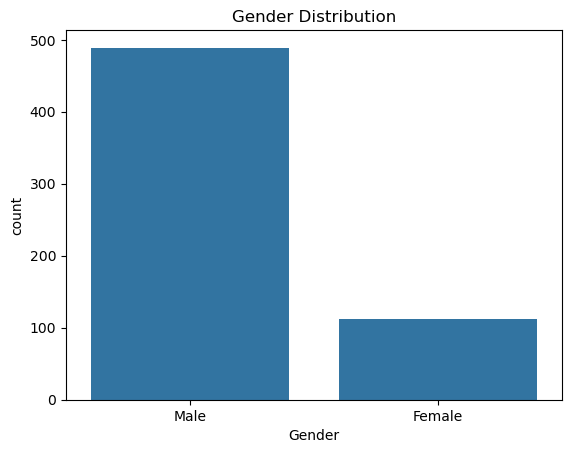

In [23]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


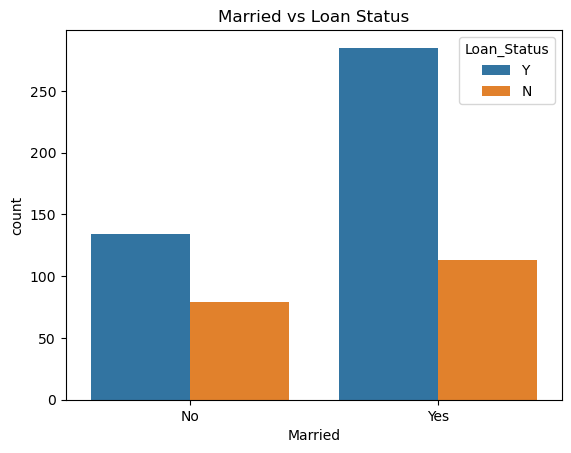

In [24]:
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title("Married vs Loan Status")
plt.show()


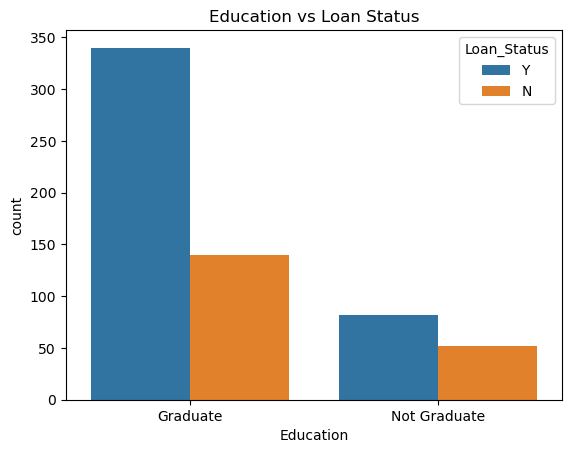

In [25]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")
plt.show()


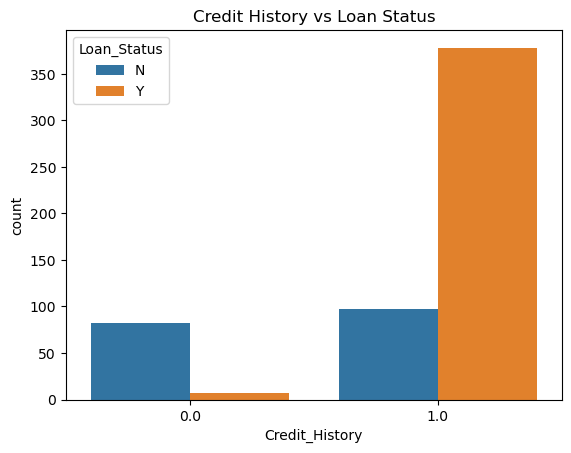

In [26]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Credit History vs Loan Status")
plt.show()


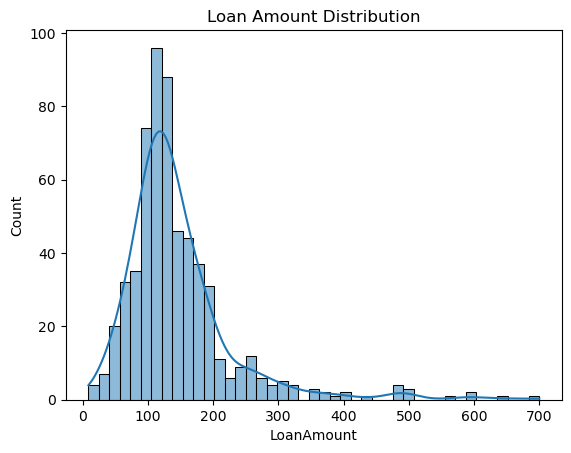

In [27]:
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()


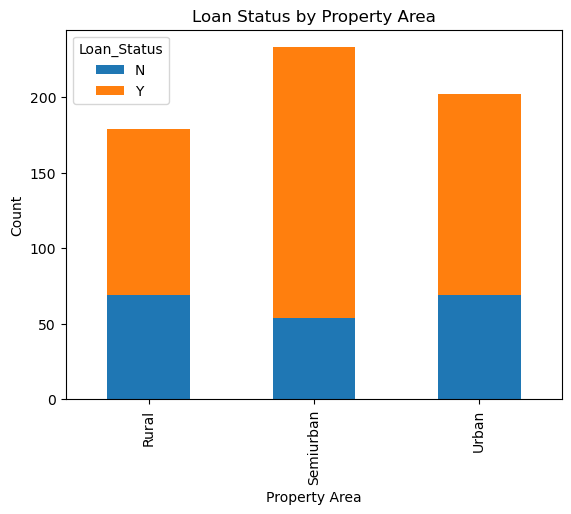

In [28]:
prop = pd.crosstab(df['Property_Area'], df['Loan_Status'])
prop.plot(kind='bar', stacked=True)
plt.title("Loan Status by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()


In [29]:
df.to_csv("cleaned_loan_data.csv", index=False)
print("Cleaned data saved!")


Cleaned data saved!


In [30]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sqlalchemy import create_engine

conn = psycopg2.connect(
    host="localhost",
    user="postgres",
    password="mypassword123",
    database="loan_db"
)


engine=create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")
table_name="train"
df.to_sql(table_name,engine,if_exists="replace",index=False)
print(f"data sucessfully load into table'{table_name}' in database'{database}'.")

data sucessfully load into table'train' in database'test1'.
